In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("food_wastage_data.csv")

In [3]:
df.shape

(1782, 11)

In [4]:
df.head()

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


In [5]:
df.tail()

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
1777,Baked Goods,310,Corporate,350,Room Temperature,Regular,Summer,Finger Food,Urban,High,35
1778,Baked Goods,284,Social Gathering,443,Room Temperature,Regular,Winter,Buffet,Rural,Low,32
1779,Fruits,220,Wedding,300,Room Temperature,Regular,All Seasons,Finger Food,Urban,Moderate,15
1780,Fruits,250,Wedding,350,Room Temperature,Regular,All Seasons,Finger Food,Rural,Moderate,20
1781,Baked Goods,400,Wedding,500,Room Temperature,Regular,Winter,Sit-down Dinner,Rural,High,45


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Food           1782 non-null   object
 1   Number of Guests       1782 non-null   int64 
 2   Event Type             1782 non-null   object
 3   Quantity of Food       1782 non-null   int64 
 4   Storage Conditions     1782 non-null   object
 5   Purchase History       1782 non-null   object
 6   Seasonality            1782 non-null   object
 7   Preparation Method     1782 non-null   object
 8   Geographical Location  1782 non-null   object
 9   Pricing                1782 non-null   object
 10  Wastage Food Amount    1782 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 153.3+ KB


In [7]:
df.isnull().sum()

Type of Food             0
Number of Guests         0
Event Type               0
Quantity of Food         0
Storage Conditions       0
Purchase History         0
Seasonality              0
Preparation Method       0
Geographical Location    0
Pricing                  0
Wastage Food Amount      0
dtype: int64

In [8]:
df.describe()

,Number of Guests,Quantity of Food,Wastage Food Amount
count,1782.000000,1782.000000,1782.000000
mean,317.804714,411.125701,28.536476
std,67.829658,65.204674,10.461317
min,207.000000,280.000000,10.000000
25%,267.000000,350.000000,20.000000
50%,302.000000,400.000000,26.500000
75%,350.000000,480.000000,35.000000
max,491.000000,500.000000,63.000000


Yiyecek miktarı ve atık miktarı arasındaki ilişki

Text(0, 0.5, 'Wastage Food Amount')

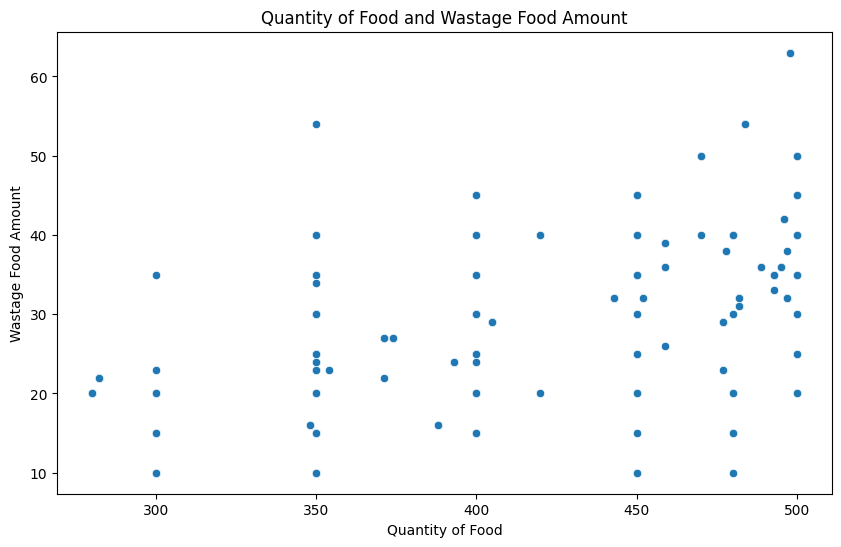

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity of Food', y='Wastage Food Amount', data=df)
plt.title('Quantity of Food and Wastage Food Amount')
plt.xlabel('Quantity of Food')
plt.ylabel('Wastage Food Amount')

Misafir sayısı ile atık gıda miktarı arasındaki ilişki

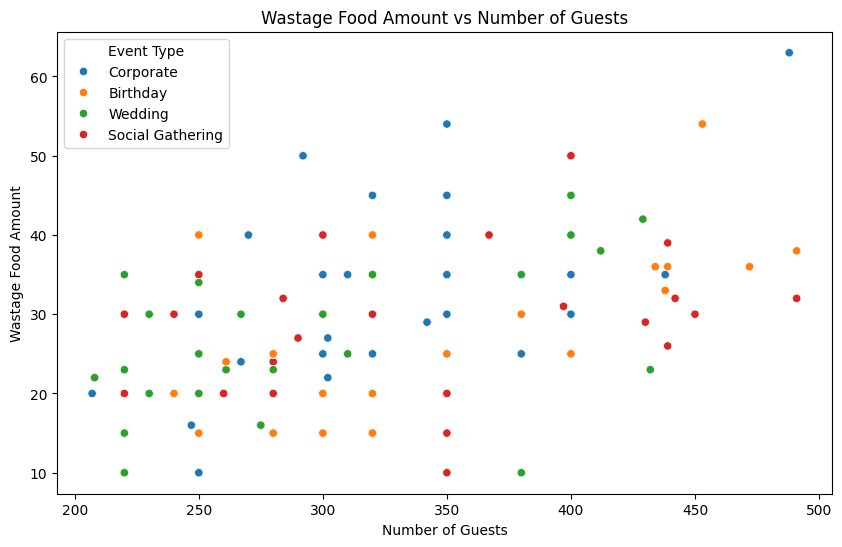

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Number of Guests", y="Wastage Food Amount", hue="Event Type", data=df)
plt.title("Wastage Food Amount vs Number of Guests")
plt.xlabel("Number of Guests")
plt.ylabel("Wastage Food Amount")
plt.show()


Etkinlik türüne göre ortalama atık miktarları

Text(0, 0.5, 'Wastage Food Amount')

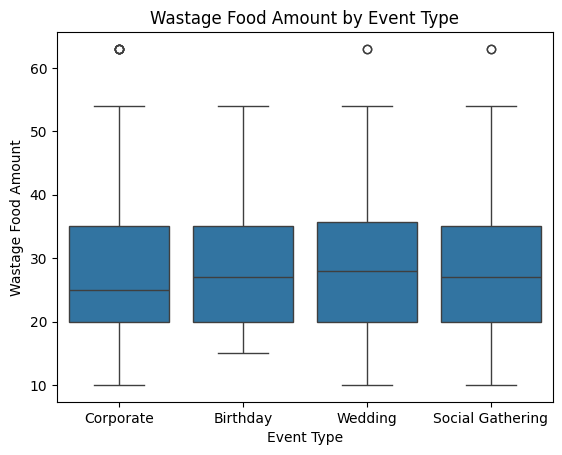

In [11]:
sns.boxplot(x="Event Type", y="Wastage Food Amount", data=df)
plt.title("Wastage Food Amount by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Wastage Food Amount")

Etkinlik Türüne Göre Toplam İsraf Edilen Yiyecek Miktarı

Text(0.5, 1.0, 'Wastage Food Amount By Event Type')

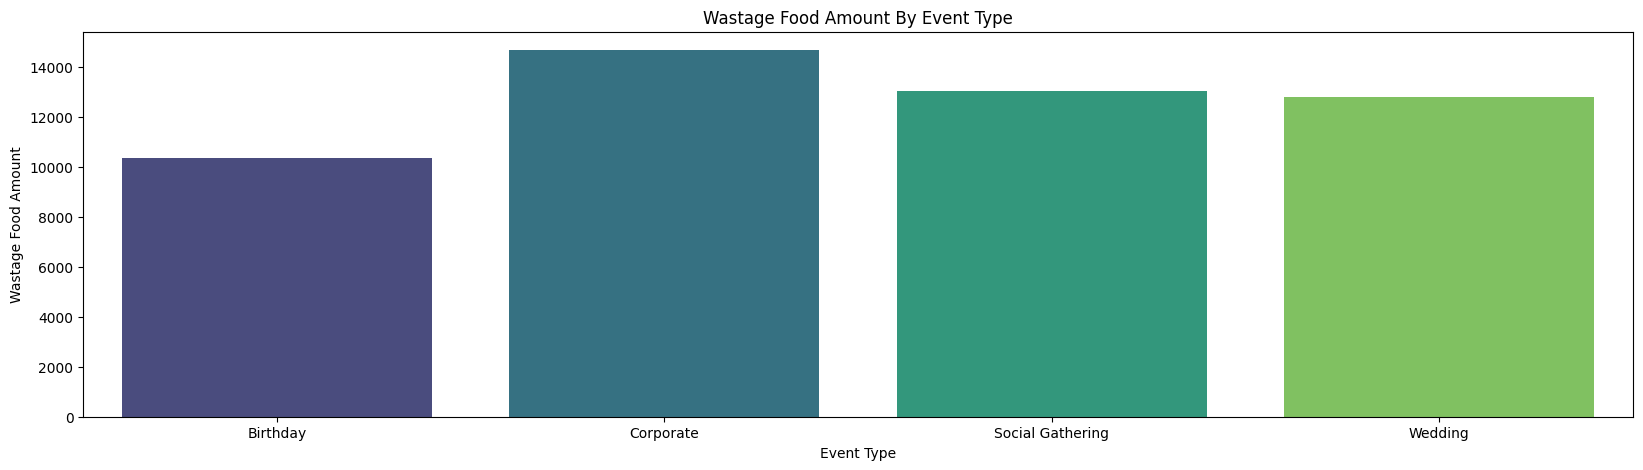

In [12]:
waste_event=df.groupby("Event Type")["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Event Type",y="Wastage Food Amount", data=waste_event, hue="Event Type", palette="viridis")
plt.title("Wastage Food Amount By Event Type")

Yemek Türüne Göre İsraf Edilen Yiyecek Miktarı

Text(0.5, 1.0, 'Wastage Food Amount By Type of Food')

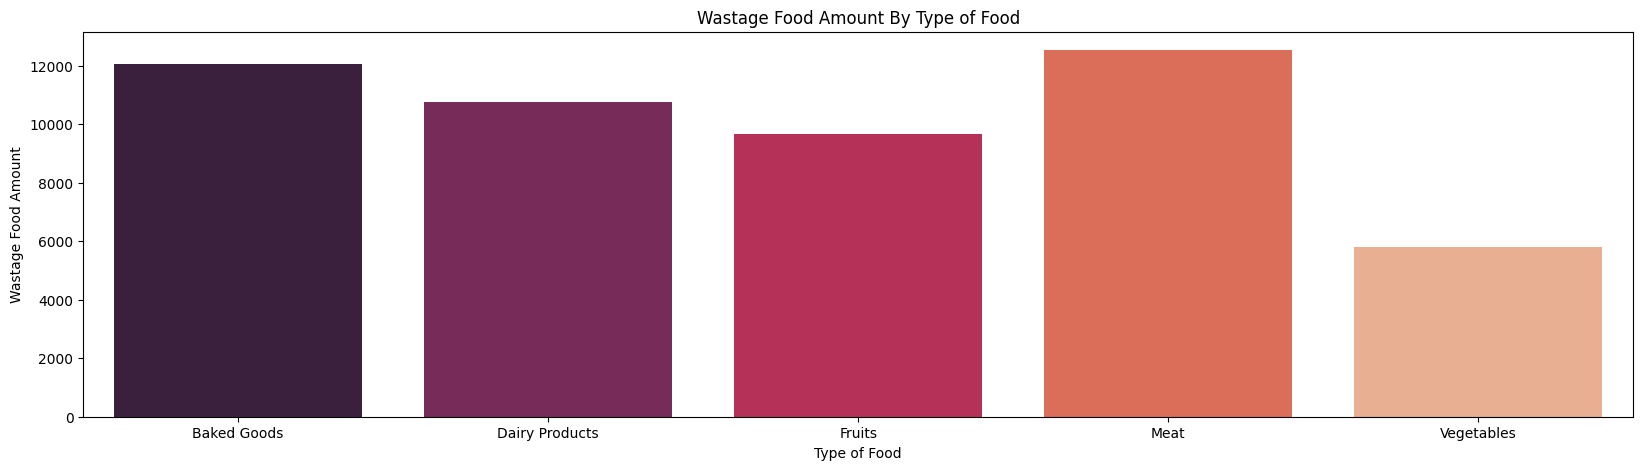

In [13]:
waste_event=df.groupby("Type of Food")["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Type of Food",y="Wastage Food Amount", data=waste_event, hue="Type of Food", palette="rocket")
plt.title("Wastage Food Amount By Type of Food")

Servis türüne göre etkinliklerdeki israf edilen yemek miktarı

Text(0.5, 1.0, 'Wastage Food Amount By Preparation Method')

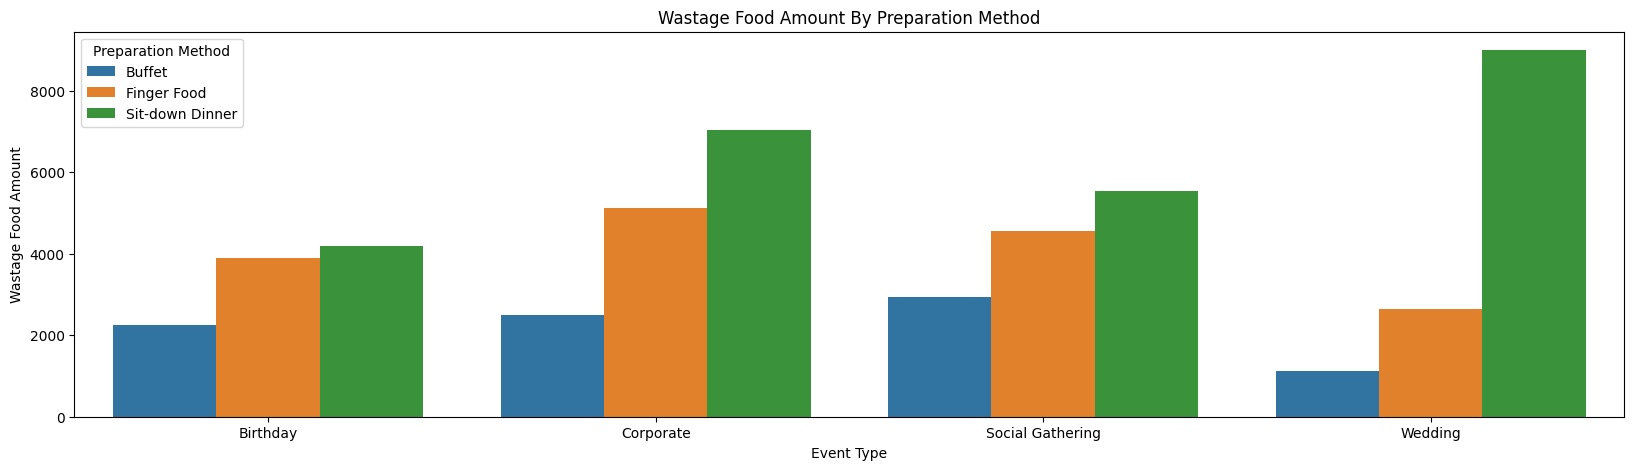

In [14]:
waste_event=df.groupby(["Preparation Method","Event Type"])["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Event Type",y="Wastage Food Amount", data=waste_event, hue="Preparation Method")
plt.title("Wastage Food Amount By Preparation Method")

Alım Türüne Göre (Ara Sıra - Düzenli) İsraf Miktarları

Text(0.5, 1.0, 'Waste Amount By Purchase and Storage')

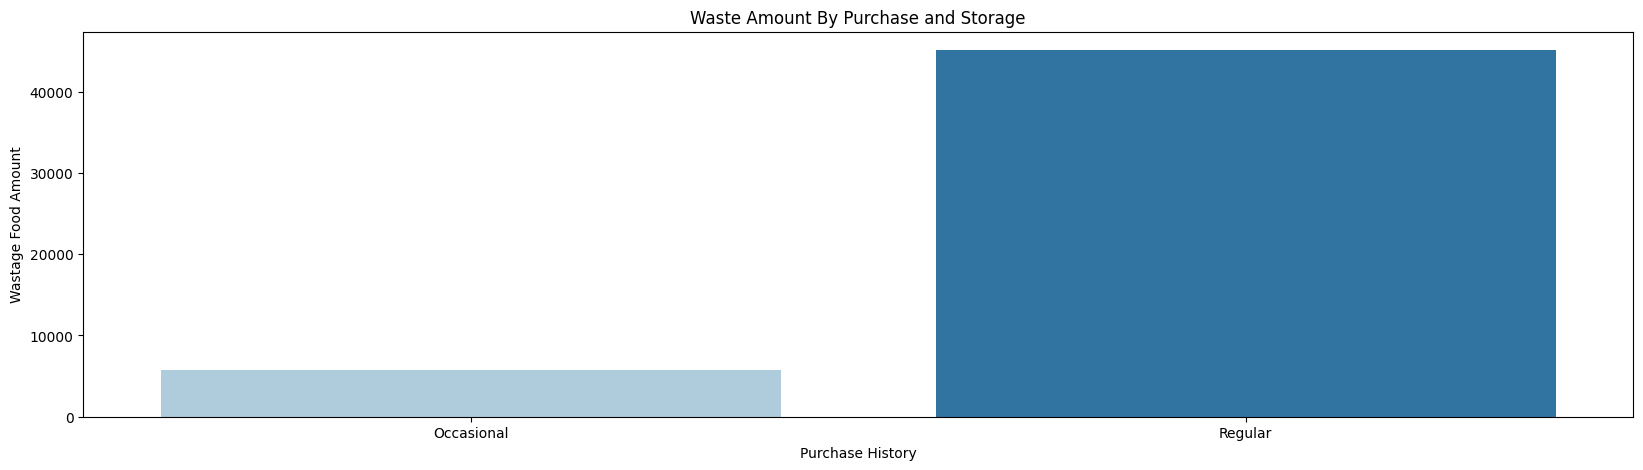

In [15]:
waste_storage_and_purchase=df.groupby(["Purchase History"])["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Purchase History", y="Wastage Food Amount", hue="Purchase History", data=waste_storage_and_purchase, palette="Paired")
plt.title("Waste Amount By Purchase and Storage")

In [16]:
df["Seasonality"].unique()

array(['All Seasons', 'Winter', 'Summer'], dtype=object)

Depolama Koşulları ve Mevsimlere Göre İsraf Olan Yemek Miktarı

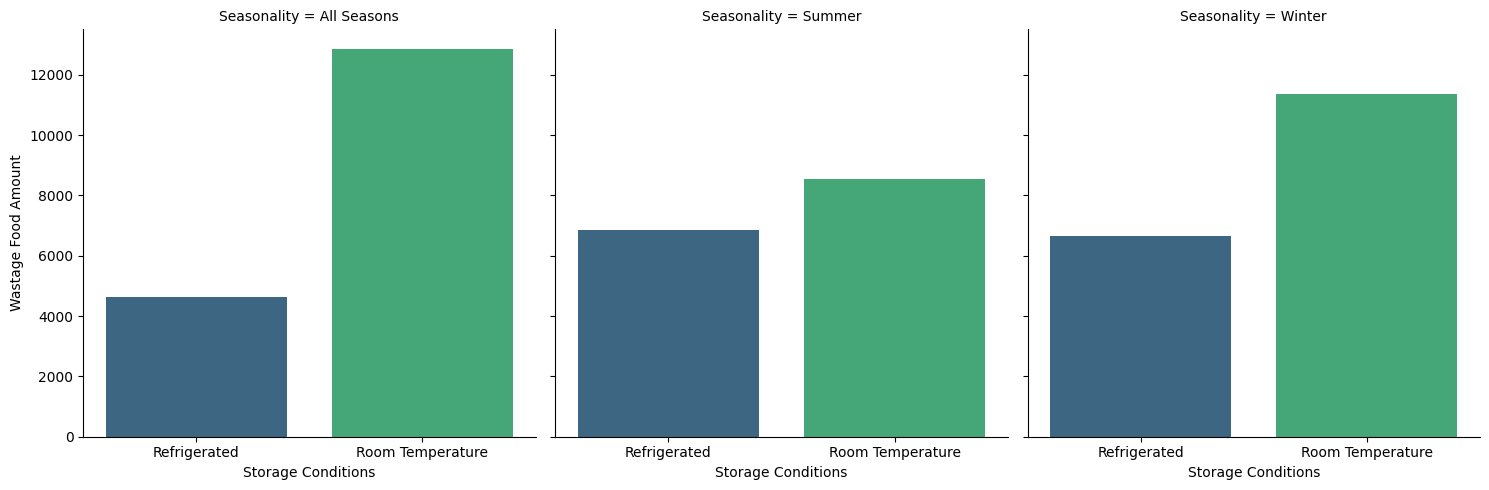

In [17]:
waste_storage_purchase=df.groupby(["Storage Conditions","Seasonality"])["Wastage Food Amount"].sum().reset_index()
sns.catplot(x="Storage Conditions", y="Wastage Food Amount", hue="Storage Conditions", col="Seasonality", data=waste_storage_purchase, kind="bar", palette="viridis")

Coğrafi bölgelere göre alım fiyatları ve israf sayıları

Text(0.5, 1.0, 'Wastage Food Amount By Geographical Location')

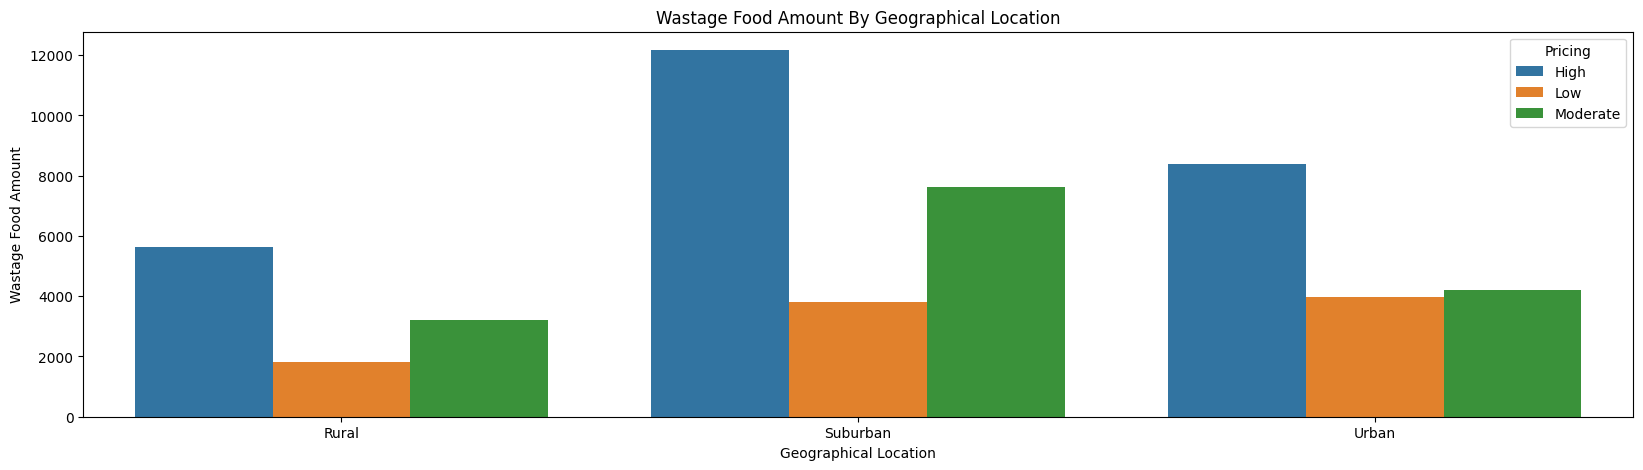

In [18]:
waste_event=df.groupby(["Geographical Location","Pricing"])["Wastage Food Amount"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Geographical Location",y="Wastage Food Amount", data=waste_event, hue="Pricing")
plt.title("Wastage Food Amount By Geographical Location")

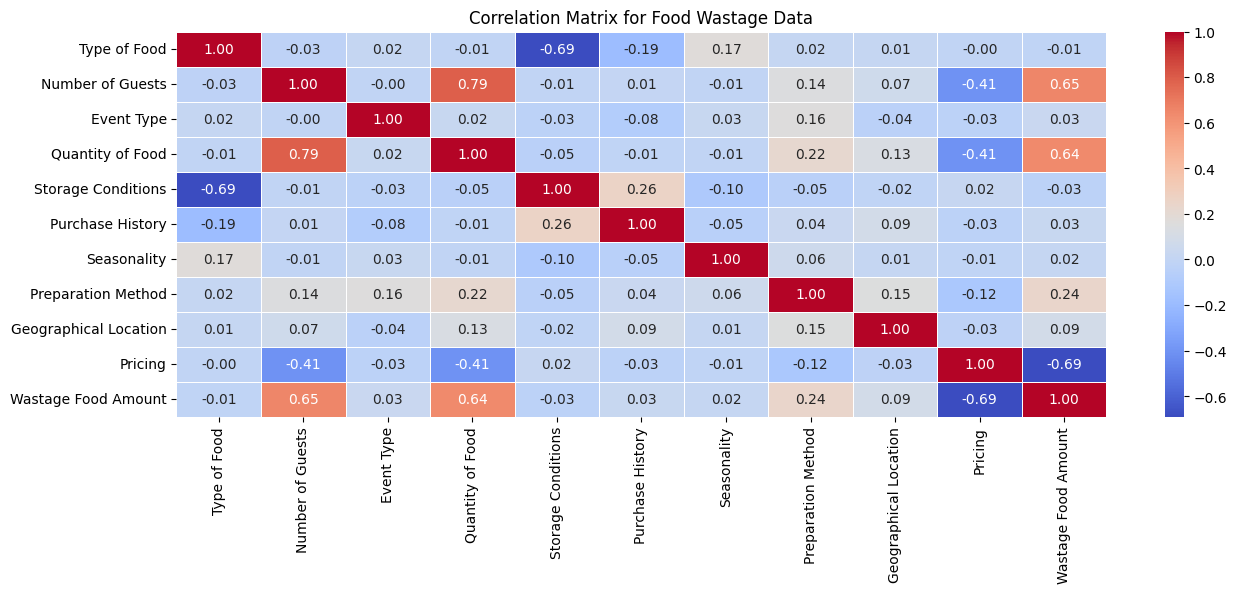

In [26]:
df_numeric = df.copy()
df_numeric['Type of Food'] = df_numeric['Type of Food'].astype('category').cat.codes
df_numeric['Event Type'] = df_numeric['Event Type'].astype('category').cat.codes
df_numeric['Storage Conditions'] = df_numeric['Storage Conditions'].astype('category').cat.codes
df_numeric['Purchase History'] = df_numeric['Purchase History'].astype('category').cat.codes
df_numeric['Seasonality'] = df_numeric['Seasonality'].astype('category').cat.codes
df_numeric['Preparation Method'] = df_numeric['Preparation Method'].astype('category').cat.codes
df_numeric['Geographical Location'] = df_numeric['Geographical Location'].astype('category').cat.codes
df_numeric['Pricing'] = df_numeric['Pricing'].astype('category').cat.codes

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Matrix for Food Wastage Data')
plt.show()

### Makine Öğrenmesi

In [20]:
df_copy=df.copy()
df_copy = pd.get_dummies(df, columns=["Type of Food","Event Type","Storage Conditions","Purchase History","Seasonality","Preparation Method","Geographical Location","Pricing"])

Bağımlı ve Bağımsız Değişkenlerin Belirlenmesi

In [21]:
X = df_copy.drop('Wastage Food Amount', axis=1)
y = df_copy['Wastage Food Amount']

Veri Setinin Eğitim ve Test Setlerine Bölünmesi

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

Modelin Tanımlanması ve Eğitilmesi

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Tahminlerin Yapılması ve Model Performansının Değerlendirilmesi

In [24]:
y_pred=model.predict(X_test)

In [25]:
model.score(X_test,y_test)

0.7563478558273058